# Handwritten digits mini project

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
import os
import torch
from torchvision import transforms
from model import ConvNet

### Load image

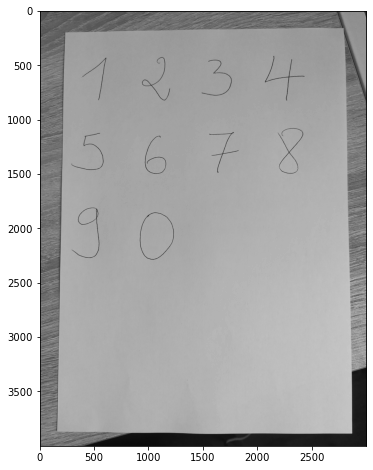

In [2]:
# Import image containing all digits
digits_pth = 'images/handwritten_digits.jpg'
all_digits = cv.imread(digits_pth, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))
plt.imshow(all_digits, cmap='gray');

### Crop each number

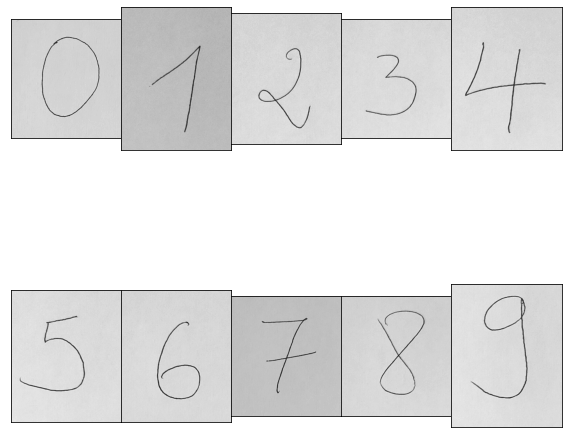

In [3]:
one = all_digits[250:900, 250: 750]
two = all_digits[250:900, 800: 1350]
three = all_digits[250:900, 1350: 1950]
four = all_digits[250:900, 2000:2500]
five = all_digits[1000:1600, 250:750]
six =  all_digits[1000:1600, 800: 1300]
seven = all_digits[1000:1600, 1400: 1950]
eight = all_digits[1000:1600, 2000: 2550]
nine = all_digits[1750:2400, 200:700]
zero = all_digits[1750: 2400, 750: 1350]


digits = [zero, one, two, three, four, five, six, seven, eight, nine]
plt.figure(figsize=(8, 8))
for idx, digit in enumerate(digits):
    
    plt.subplot(2, 5, idx+1)
    plt.imshow(digit, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### Preprocess

In [5]:
def preprocess(img, n_iterations, kernel):
    """Given an image, applies Otsu thresholding, dilation and finally resizing to 28x28 dimensions

    Args:
        img (ndarray): Image (1 channel) on which on to apply transformations
        n_iterations (int): Number of iterations in dilation step
        kernel (odd int): kernel size in dilation step

    Returns:
        ndarray: a 28X28 image(1 channel)
    """
    _, img = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    img = cv.dilate(img, (kernel, kernel), iterations=n_iterations)

    return cv.resize(img, (28, 28))
    
    

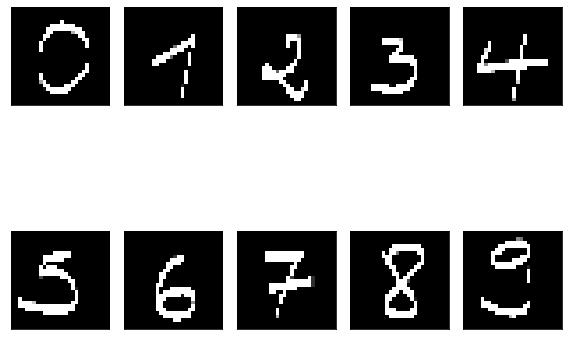

In [6]:
preprocessed_imgs = [preprocess(img, 50, 3) for img in digits]
plt.figure(figsize=(8, 8))
for idx, digit in enumerate(preprocessed_imgs):
    
    plt.subplot(2, 5, idx+1)
    plt.imshow(digit, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [7]:
# Save preprocessed images
for idx, img in enumerate(preprocessed_imgs):
    cv.imwrite(f'images/digits/{str(idx)}.png', img)
    

### Predictions

In [8]:
# Load model and setup transformation pipeline
convnet = ConvNet()
convnet.load_state_dict(torch.load('model.pth'))

transform = transforms.Compose([
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5), (0.5))
                                ])

In [16]:
# Prediction (one at a time)
root_dir = 'images/digits/'
img_file = '8.png'
digit = cv.imread(root_dir + img_file, cv.IMREAD_GRAYSCALE)

convnet.eval()
with torch.no_grad():
    trsf_digit = transform(digit).unsqueeze(0)
    logsoft = convnet(trsf_digit)
    print(torch.argmax(logsoft, 1))

tensor([8])


In [9]:
# Predict all digits

# To visualize predictions
def view_classify(img, ps, pred):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap = 'Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title(f'Prediction: {pred}')
    ax2.set_xlim(0, 1.1)

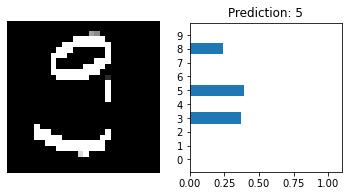

In [18]:

for file in os.listdir(root_dir):
    digit = cv.imread(root_dir + file, cv.IMREAD_GRAYSCALE)
    trsf_digit = transform(digit).unsqueeze(0)
    
    convnet.eval()
    with torch.no_grad():
        logsoft = convnet(trsf_digit)

    ps = torch.exp(logsoft)
    pred = torch.argmax(ps, 1).item()
    view_classify(trsf_digit, ps, pred)
    plt.show()
    time.sleep(3)
    clear_output(wait=True)